<a href="https://colab.research.google.com/github/mwaura-k/week7/blob/main/Karen_Mwaura_Week7_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Define the question

We will be working for Hass Consulting Company, a real estate firm. The goal is to determine the factors that may affect housing prices; information that was gathered over the previous months. Also, we are to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### Success Metrics

For this project to be successful, several factors have to be accomplished. 
These are:

*   Ensuring that the models created are able to give accurate predictions; 80% accuracy on the sale of prices with the right predictor variables.
*   Determine the factors that affect the pricing of houses and giving insights and recommendations from the data collected. 



### Context for the project

Hass Consult Limited is a Real Estate firm that was formed in the year 1992. They have been in the market over 25+ years still holding onto a vision to establish a comprehensive firm that reinvents the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.

The company offers a variety of services ranging from new property development and consultancy to letting, selling and managing of residential and commercial properties, and more recently valuations of all kinds of properties, including hotels, businesses and industries.

### Experimental design taken



*   Our dataset is sufficient to answer the question on sale prices and to make predictions
*   Load the dataset and study it.
*   Perform data cleaning.
*   Check for anomalies, outliers and missing values and deal with them.


*   Perform univariate, bivariate and multivariate analysis and record the observations.

*   Performing regression analysis. Here we will perform modelling using several regression techniques like;

              Multiple Linear Regression
              Quantile Regression
              Ridge Regression
              Lasso Regression
              Elastic Net Regression



*   Evaluate the performance of the models and give recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 
*   Check for multicollinearity

*   Create residual plots for the models, and assess heteroskedasticity using Barlett's test.
*   Challenge your solution by providing insights and giving recommendations.










### Data relevance

The dataset we are working with is house_data. The dataset has 20 rows and 21614 rows. The dataset is relevant to answering the primary questions.

# Import Libraries

In [ ]:
# Import the relevant libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the dataset

In [ ]:
# Load house_data dataset
house_df=pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

# Preview first five records
house_df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Preview last five records
house_df.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Preview sample data
house_df.sample(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1785,8732130140,285000.0,4,2.25,2150,8250,1.0,0,0,4,7,1240,910,1978,0,98023,47.3045,-122.378,2050,7875
10309,2472950350,312500.0,4,2.50,2500,11983,1.0,0,0,3,7,1320,1180,1984,2008,98058,47.4292,-122.148,1460,9005
17328,868001435,2230000.0,3,3.00,3450,16740,1.0,0,4,4,9,1960,1490,1949,1993,98177,47.7067,-122.380,3220,12528
16780,638100073,327000.0,3,1.50,1320,13200,1.0,0,0,3,7,1320,0,1970,0,98059,47.5009,-122.143,1730,13200
16224,2123049502,215000.0,3,2.00,1340,8505,1.0,0,0,3,6,1340,0,1931,0,98168,47.4727,-122.297,1370,9000


In [ ]:
# Determine the number of rows and columns of the dataset
house_df.shape

(21613, 20)

In [ ]:
# Determine the datatypes of the columns
house_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# data statistical view
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Cleaning the data

In [ ]:
# check if dataset has missing values
house_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The data does not have any missing values.

In [ ]:
# Checking for any duplicates
house_df.duplicated().sum()

3

In [ ]:
# drop the duplicates
house_df.drop_duplicates(inplace=True)

In [ ]:
# Confirming if the values are dropped
house_df.duplicated().sum()

0

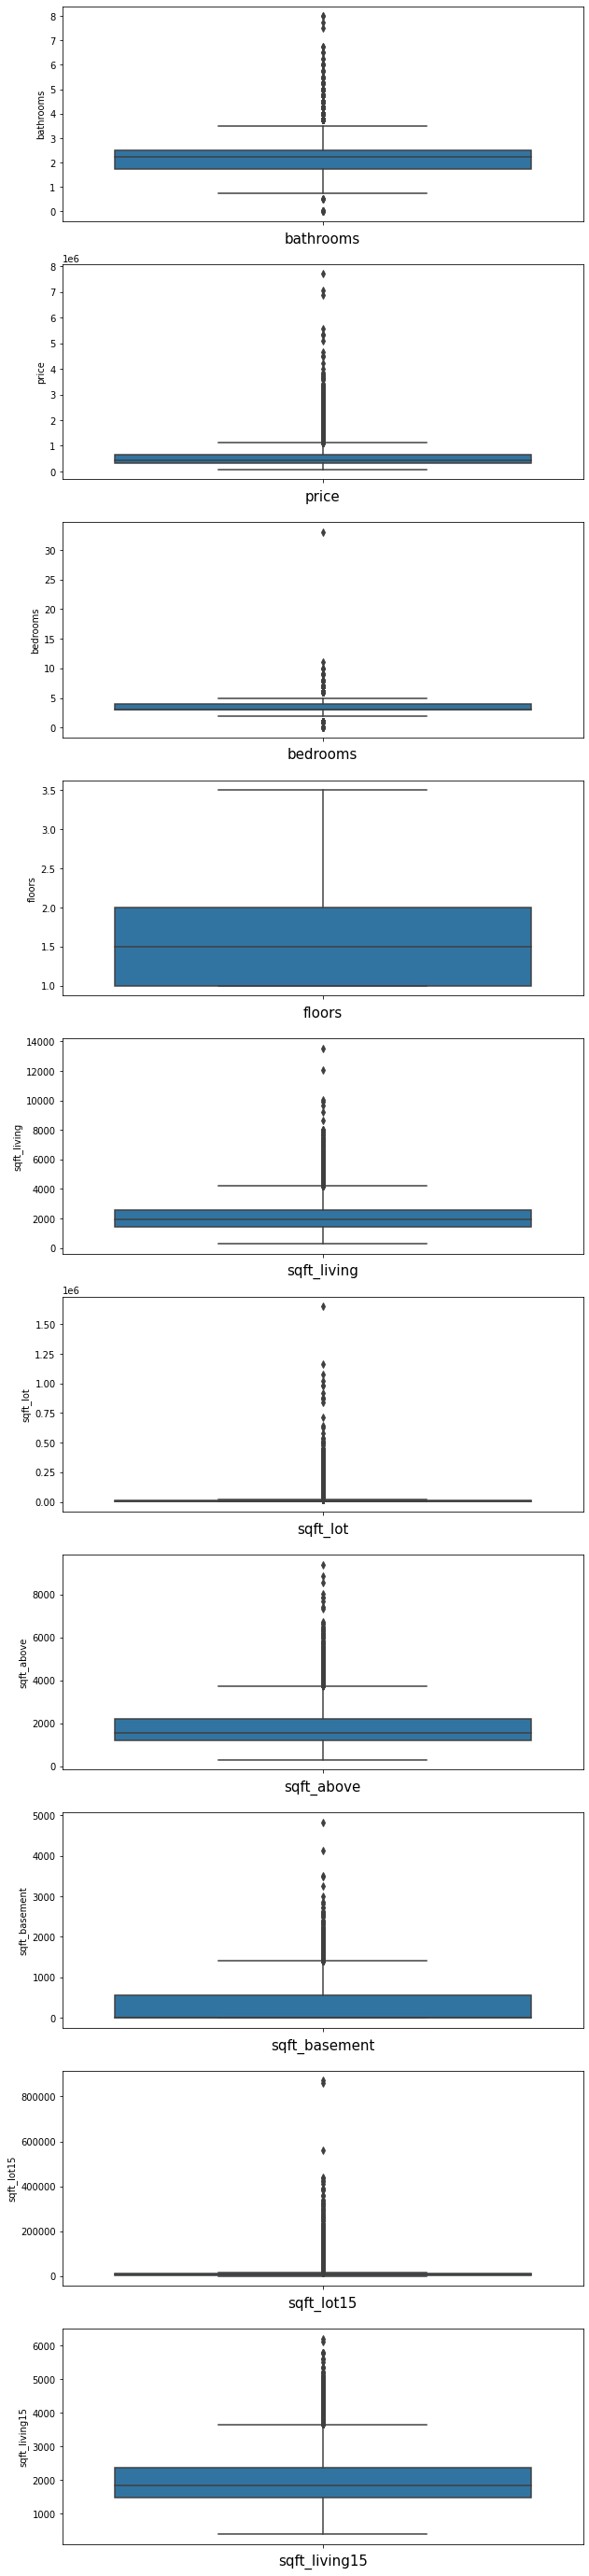

In [ ]:
# checking for outliers
col_name= ['bathrooms','price','bedrooms','floors','sqft_living','sqft_lot', 'sqft_above', 'sqft_basement','sqft_lot15', 'sqft_living15']

fig,ax = plt.subplots(len(col_name),figsize=(10,50))
for i , col_val in enumerate(col_name):
  sns.boxplot(y=house_df[col_val],ax=ax[i])
  
  ax[i].set_xlabel(col_val,fontsize=15)

In [ ]:
# Dealing with the outliers
import scipy.stats as stats

#Get the z-score for our data
z_score = np.abs(stats.zscore(house_df))

#Keep the rows with a z-score less than absolute value of 2
# 
# house_df = house_df[(z<2).all(axis=1)]

#get the number of rows

house_df.shape

(21610, 20)

In [ ]:
# Dropping unneccessary columns
house_df.drop(columns=['id','grade','lat','long','sqft_basement','sqft_above'],inplace=True)

In [ ]:
# Convert numerical to categorical data
house_df=house_df.replace({'waterfront': {0 :'no', 1 :'yes'}})

# EDA

### Univariate analysis

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21610 non-null  float64
 1   bedrooms       21610 non-null  int64  
 2   bathrooms      21610 non-null  float64
 3   sqft_living    21610 non-null  int64  
 4   sqft_lot       21610 non-null  int64  
 5   floors         21610 non-null  float64
 6   waterfront     21610 non-null  int64  
 7   view           21610 non-null  int64  
 8   condition      21610 non-null  int64  
 9   yr_built       21610 non-null  int64  
 10  yr_renovated   21610 non-null  int64  
 11  zipcode        21610 non-null  int64  
 12  sqft_living15  21610 non-null  int64  
 13  sqft_lot15     21610 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.5 MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


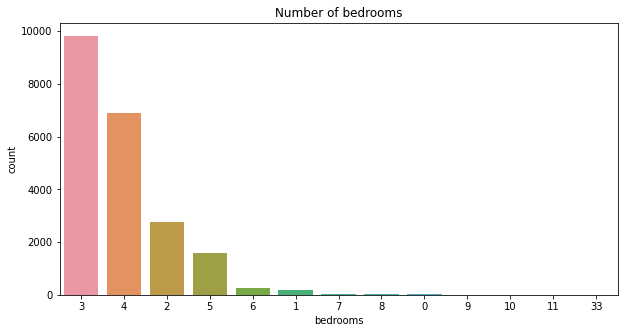

In [ ]:
#Univariate analysis
# 

plt.figure(figsize=(10, 5))
plt.title('Number of bedrooms')
sns.countplot(house_df.bedrooms.dropna(), order = house_df.bedrooms.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


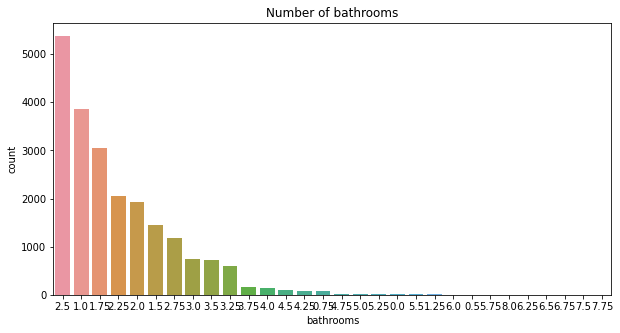

In [ ]:
#Univariate analysis
# 

plt.figure(figsize=(10, 5))
plt.title('Number of bathrooms')
sns.countplot(house_df.bathrooms.dropna(), order = house_df.bathrooms.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


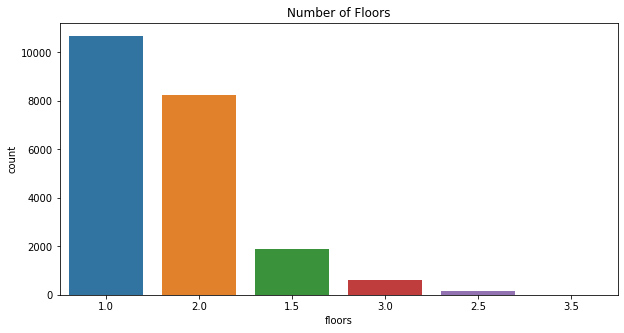

In [ ]:
#Univariate analysis
# 

plt.figure(figsize=(10, 5))
plt.title('Number of Floors')
sns.countplot(house_df.floors.dropna(), order = house_df.floors.value_counts().index);

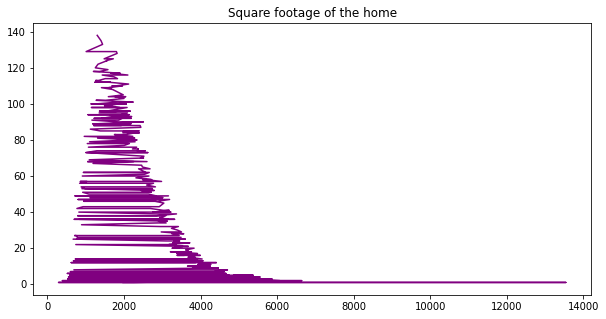

In [ ]:
#Univariate analysis
# 

plt.figure(figsize=(10, 5))
plt.title('Square footage of the home')
house_df['sqft_living'].value_counts().plot(kind = 'line', color = 'purple')
# sns.countplot(house_df.sqft_living .dropna(), order = house_df.sqft_living .value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


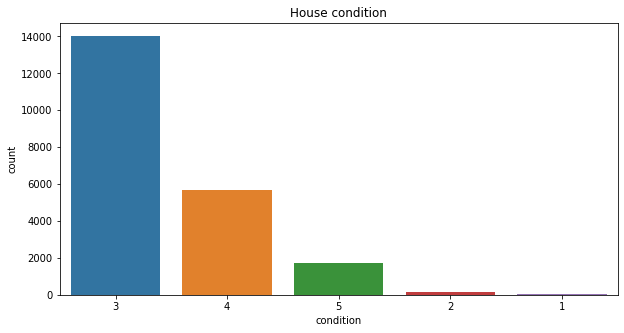

In [ ]:
#Univariate analysis
# 

plt.figure(figsize=(10, 5))
plt.title('House condition')
sns.countplot(house_df.condition.dropna(), order = house_df.condition.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


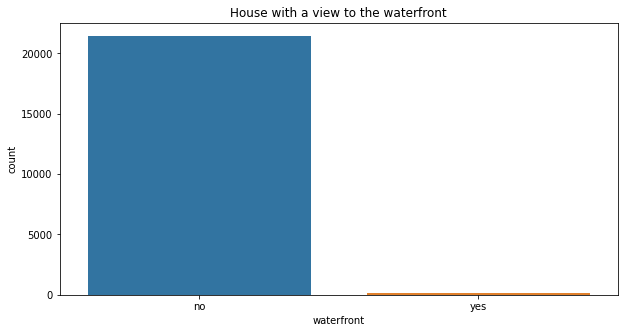

In [ ]:
#Univariate analysis
# 

plt.figure(figsize=(10, 5))
plt.title('House with a view to the waterfront')
sns.countplot(house_df.waterfront.dropna(), order = house_df.waterfront.value_counts().index);

From the above analysis we can observe that;

*   Majority of the houses managed by Hass firm have three bedrooms.
*   Most of the houses have a total number of 2.5 bathrooms.The .5 bathroom in my assumption is the powder room for guests.

*   Most of the houses are built with one floor
*   Majority of the houses do not have a view of the waterfront.

*   The houses have house condition of 3,meaning the houses are average.
*   Most of the houses are average in size as they sit on an average of 2400sq feet.






### Bivariate

In [ ]:
# Check for correlation
corr = house_df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.053980,0.126503,-0.053162,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.154276,0.018695,-0.152721,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.505997,0.050879,-0.203831,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.318099,0.055314,-0.199435,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.053105,0.007677,-0.129611,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.489347,0.006156,-0.059025,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,-0.026159,0.092950,0.030277,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,-0.053229,0.103208,0.084838,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.361347,-0.060862,0.002962,-0.092854,-0.003424
yr_built,0.053980,0.154276,0.505997,0.318099,0.053105,0.489347,-0.026159,-0.053229,-0.361347,1.000000,-0.224729,-0.346808,0.326298,0.070999


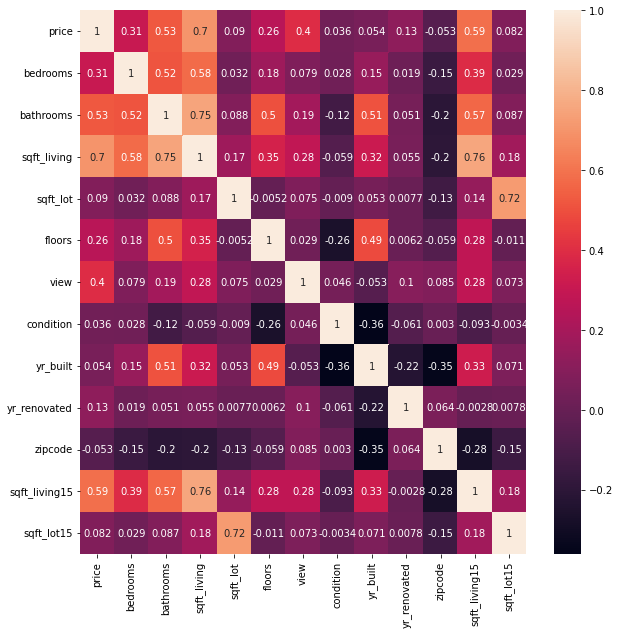

In [ ]:
# Plot a heatmap to identify correlation
plt.figure(figsize = (10, 10))
sns.heatmap(house_df.corr(), xticklabels = house_df.corr().columns, yticklabels = house_df.corr().columns, annot=True)
plt.show()

## Check for collinearity

In [ ]:
# Check for collinearity
corr = house_df.drop('price', axis = 1).corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,0.079433,0.028422,0.154276,0.018695,-0.152721,0.391633,0.029233
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.187891,-0.124940,0.505997,0.050879,-0.203831,0.568665,0.087191
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.284641,-0.058768,0.318099,0.055314,-0.199435,0.756420,0.183285
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.074753,-0.008967,0.053105,0.007677,-0.129611,0.144620,0.718556
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.029325,-0.263779,0.489347,0.006156,-0.059025,0.279861,-0.011250
view,0.079433,0.187891,0.284641,0.074753,0.029325,1.000000,0.045836,-0.053229,0.103208,0.084838,0.280404,0.072577
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.045836,1.000000,-0.361347,-0.060862,0.002962,-0.092854,-0.003424
yr_built,0.154276,0.505997,0.318099,0.053105,0.489347,-0.053229,-0.361347,1.000000,-0.224729,-0.346808,0.326298,0.070999
yr_renovated,0.018695,0.050879,0.055314,0.007677,0.006156,0.103208,-0.060862,-0.224729,1.000000,0.064388,-0.002841,0.007837
zipcode,-0.152721,-0.203831,-0.199435,-0.129611,-0.059025,0.084838,0.002962,-0.346808,0.064388,1.000000,-0.279033,-0.147257


In [ ]:
# Calculating VIF; Variance Inflation Factor
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
vif_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.615186,-0.441135,-0.834855,0.050481,0.101179,0.143260,-0.051654,0.174669,0.052439,0.094027,0.124542,0.076773
bathrooms,-0.441135,3.241171,-1.791954,-0.000548,-0.531220,-0.099800,-0.161767,-0.924280,-0.259203,-0.043002,0.117401,0.099654
sqft_living,-0.834855,-1.791954,4.326516,-0.199779,-0.106392,-0.239451,-0.042038,0.281464,-0.043395,-0.090845,-1.896755,-0.138295
sqft_lot,0.050481,-0.000548,-0.199779,2.085543,0.017517,-0.035403,0.033401,0.042494,0.016594,0.070416,0.114065,-1.474184
floors,0.101179,-0.531220,-0.106392,0.017517,1.562542,0.059416,0.145678,-0.510568,-0.079340,-0.185886,0.001043,0.073346
view,0.143260,-0.099800,-0.239451,-0.035403,0.059416,1.178490,-0.049124,0.131619,-0.069420,-0.167907,-0.255116,0.002019
condition,-0.051654,-0.161767,-0.042038,0.033401,0.145678,-0.049124,1.238627,0.547294,0.203679,0.164975,0.099945,-0.025704
yr_built,0.174669,-0.924280,0.281464,0.042494,-0.510568,0.131619,0.547294,2.148848,0.500429,0.518265,-0.146743,-0.073348
yr_renovated,0.052439,-0.259203,-0.043395,0.016594,-0.079340,-0.069420,0.203679,0.500429,1.143060,0.068013,0.081849,-0.027526
zipcode,0.094027,-0.043002,-0.090845,0.070416,-0.185886,-0.167907,0.164975,0.518265,0.068013,1.278406,0.336101,0.067067


### Multiple Linear Regression


In [ ]:
# Creating X and y variables
#
X = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','view',
       'condition', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']]
y = house_df.price

# Encode(one hot encoding) categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Set train and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error,r2_score
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Make predictions
#
y_pred = regressor.predict(X_test)

In [ ]:
regressor.coef_

array([-6.08801583e+04,  6.71464764e+04,  2.32389811e+02, -1.05278448e-01,
        5.72960297e+04,  7.28487967e+04,  2.21915099e+04, -2.91093040e+03,
        2.11693722e+01,  6.01271881e+01,  7.84377589e+01, -6.66581798e-01])

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-60880.158311
bathrooms,67146.476371
sqft_living,232.389811
sqft_lot,-0.105278
floors,57296.029703
view,72848.796708
condition,22191.509883
yr_built,-2910.930401
yr_renovated,21.169372
zipcode,60.127188


In [ ]:
house_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
house_df

,Actual,Predicted
20188,602000.0,402235.374352
7573,320000.0,340896.589221
12873,245000.0,312400.977373
209,464000.0,660211.442450
19155,190000.0,371377.624986
...,...,...
18066,589000.0,722421.822031
13241,299000.0,369184.928506
8864,281000.0,448276.472505
5099,1150000.0,730910.546394


In [ ]:
# Evaluate the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 154805.78154382846
Mean Squared Error: 58599984273.84449
Root Mean Squared Error: 242074.3362561271


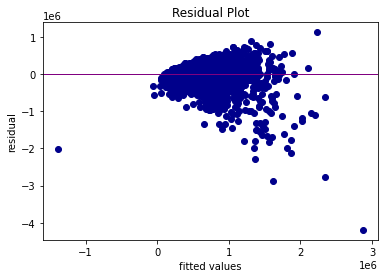

In [ ]:
#plot residual plot to assess correctness of the model
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='darkblue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='purple', linewidth=1)
plt.show()

### Barlett's Test of Heteroskedacity

In [ ]:
#perform a heteroscedasticity test using bartlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# #compute a critical value of the chi squared distribution
#for results interpretation
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous')

inf
The variances are homogeneous


### Ridge Regression

In [ ]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Creating X and y variables
X=house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','view',
       'condition', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']]
y=house_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Splitting the dataset into training and testing sets
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# determine the most appropriate value for the l2 regularization. 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
import warnings
warnings.filterwarnings("ignore")
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

55536588264.42134

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

54822512170.17082


In [ ]:
print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 242074.3362561271
The R2 score for the ridge model is: 0.5847396297701608


### Lasso Regression

In [ ]:
# Loading libraries
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5939257852521928
lasso MSE: 54806777627.054375
lasso coef: [-5.28482961e+04  4.50169925e+04  2.16689704e+05 -1.77618335e+02
  3.24100011e+04  5.89419907e+04  1.41414520e+04 -8.41953873e+04
  8.87653918e+03  4.17818272e+03  5.41179554e+04 -1.89298726e+04]


In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.5793567437831907
linear score: 0.5793436408767272
lasso MSE: 58814594670.03112
linear MSE: 58816426726.34312
lasso best estimator coef: [-57493.20117906  49810.07281652 215260.84656168  -4589.4036911
  31445.18400376  56906.17622199  14610.76698039 -85323.44080891
   8155.59883093   2916.30119382  53727.92826754 -18451.21286085]
linear coef: [-57565.06012563  49849.83729331 215291.3536404   -4608.85101819
  31474.12349     56907.81498318  14637.36314096 -85369.77121881
   8166.46247822   2929.92451326  53752.90877901 -18468.73048702]


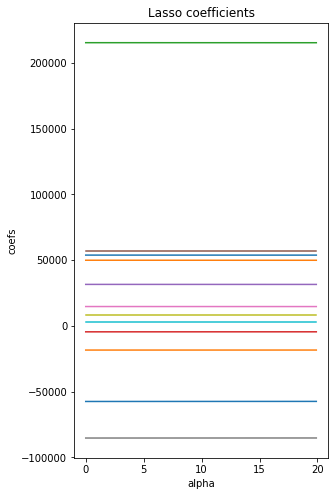

In [ ]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Build Lasso coefficient plots
# 
plt.figure(figsize = (10,8))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


### Elastic Net

In [ ]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create grid
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

54806777614.24556


In [ ]:
# fit our model and display the best parameters

search.fit(X,y)
search.best_params_
abs(search.best_score_)

55635441947.63383

### Quantile Regression

In [ ]:

# Splitting our data into training and test sets

X = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','view',
       'condition', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']].values
y = house['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Text(0.5, 1.0, 'Data with constant variance')

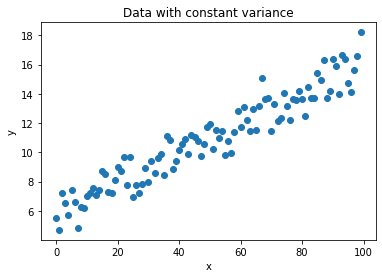

In [ ]:
# This is the assumption of linear regression
# 
x = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)

## Regression equation
y = intercept_ + slope_ * x + error_

plt.figure(1)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with constant variance")


In [ ]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))


Mean squared error: 0.85
Variance score: 0.91


Text(0.5, 1.0, 'Linear regression')

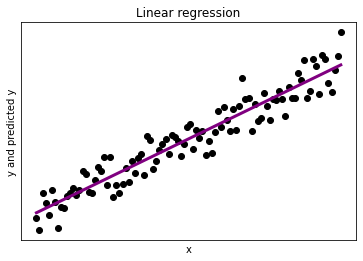

In [ ]:
# Plotting the regression
plt.figure(2)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='purple',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

Text(0.5, 1.0, 'Data with non-constant variance')

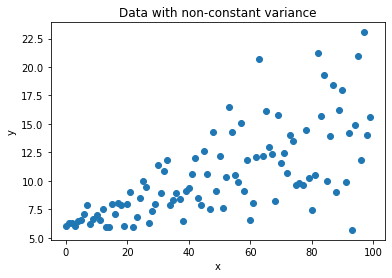

In [ ]:
# Now let get to work with some data that violates 
# our linear regression assumption. This means first 
# adding some noise to our dataset. 
# We will first generating some data with non-constant variance
# 
x_ = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## Non constant variance
var_ = 0.1 + 0.05 * x_

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_)

## Linear egression equation
y_ = intercept_ + slope_ * x + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

In [ ]:
# Let's now trying to fit a linear regression
# 
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))

Mean squared error: 8.21
Variance score: 0.46


In [ ]:
# Now implementing quantile regression for the median, 0.5th quantile
house_df = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"])
house_df.head()

,x,y
0,0.0,6.049444
1,1.0,6.261717
2,2.0,6.276781
3,3.0,6.035014
4,4.0,6.482710


In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

In [ ]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', house_df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())
 

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3367
Model:                       QuantReg   Bandwidth:                       2.072
Method:                 Least Squares   Sparsity:                        5.633
Date:                Sun, 28 Nov 2021   No. Observations:                  100
Time:                        09:27:25   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0688      0.559     10.855      0.000       4.959       7.178
x              0.0911      0.010      9.338      0.000       0.072       0.110


In [ ]:
# Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   5.360674  0.042615        0.023330        0.061900
1  0.2   5.888667  0.048782        0.029071        0.068494
2  0.3   6.049444  0.057124        0.036902        0.077347
3  0.4   5.880968  0.082268        0.063016        0.101521
4  0.5   6.068809  0.091105        0.071744        0.110467
5  0.6   6.098129  0.096145        0.077614        0.114676
6  0.7   6.153319  0.108396        0.088001        0.128790
7  0.8   6.050969  0.141988        0.115938        0.168038
8  0.9   6.104234  0.157483        0.133259        0.181706


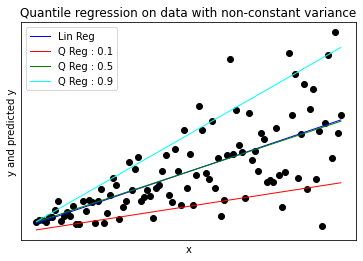

In [ ]:
# Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=1, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=1, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=1, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=1, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()


### Follow up questions

*   Do we have the right data? Yes the data was enough to solve the tasks

*   Did we answer the questions? The question was answered from the above observations


*   Did we need any more data? The data was sufficient 



